In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt

Using TensorFlow backend.
/root/.local/share/canopy/edm/envs/User/lib/python3.5/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [3]:
#mengambil nilai dari dataasli dan menyimpan ke Dataset untuk di eksekusi
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [4]:
#mengambil data input sebagai x data output y/ train
X = dataset[:,0:10]
Y = dataset[:,10]

In [5]:
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]])

In [6]:
Y

array([1, 1, 1, ..., 1, 0, 0])

In [7]:
#normalisasi
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

/root/.local/share/canopy/edm/envs/User/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [8]:
#membagi input dan data train
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size = 0.3)
X_val, X_test, Y_val,Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size = 0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [9]:
#membuat struktur jaringan syaraf 2 hidden layer, 10 input dan 1 output
#layer1 32 hidden cell
#layer2 32 hidden cell
#dan juga fungsi aktivasi sigmoid, dan untuk layer 1~2 activasi menggunakan Relu

model = Sequential([
    Dense(32, activation = 'relu', input_shape = (10,)),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

#membuat configurasi jenis training menggunakan SGD('stochastic gradien decent)
#loss fungsi menggunakan configurasi binary crossentropy
model.compile(optimizer = 'sgd',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [10]:
#melakukan train, dengan cara memasukan data train se
hist = model.fit(X_train, Y_train,
                batch_size = 32, epochs = 100,
                validation_data = (X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 208us/step - loss: 0.6957 - acc: 0.4579 - val_loss: 0.6902 - val_acc: 0.5388
Epoch 2/100
1022/1022 [==============================] - 0s 35us/step - loss: 0.6880 - acc: 0.6047 - val_loss: 0.6842 - val_acc: 0.6027
Epoch 3/100
1022/1022 [==============================] - 0s 35us/step - loss: 0.6815 - acc: 0.6213 - val_loss: 0.6794 - val_acc: 0.5571
Epoch 4/100
1022/1022 [==============================] - 0s 31us/step - loss: 0.6761 - acc: 0.6018 - val_loss: 0.6750 - val_acc: 0.6027
Epoch 5/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.6712 - acc: 0.6751 - val_loss: 0.6709 - val_acc: 0.6256
Epoch 6/100
1022/1022 [==============================] - 0s 32us/step - loss: 

In [11]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 29us/step


0.8538812766336414

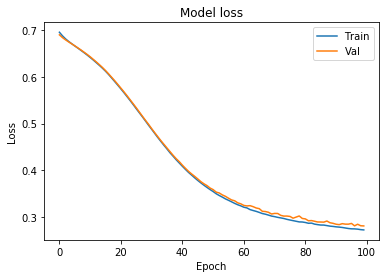

In [12]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

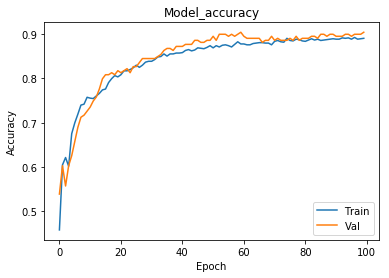

In [13]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()